## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [10]:
import pandas as pd

import graphviz
import numpy

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor as DTRegressor
from sklearn.model_selection import train_test_split as TTS

In [11]:
data = pd.read_csv('4.data.txt')
data.cause.value_counts()

Gunshot              411
Taser                 27
Death in custody      14
Struck by vehicle     12
Unknown                3
Name: cause, dtype: int64

In [12]:
data = data.dropna()
data.cause.value_counts()

Gunshot              381
Taser                 26
Death in custody      14
Struck by vehicle     12
Unknown                3
Name: cause, dtype: int64

In [14]:
data = data[data.cause != 'Unknown']
data.cause.value_counts()

Gunshot              381
Taser                 26
Death in custody      14
Struck by vehicle     12
Name: cause, dtype: int64

### Split dataset

In [15]:
trainset, testset = TTS(data, test_size = 0.3, stratify = data['cause'], random_state = 42)
print(trainset.shape, testset.shape)

(303, 34) (130, 34)


### Decision Tree Regressor

In [17]:
dtr = DTRegressor(max_depth = 2)
dtr.fit(trainset[['urate']], trainset['college'])

DecisionTreeRegressor(max_depth=2)

### Predictions

In [22]:
predictionsTrain = dtr.predict(trainset[['urate']])

unique, counts = numpy.unique(predictionsTrain, return_counts = True)
dict(zip(unique, counts))

{0.1416790510814815: 135,
 0.19402222275: 4,
 0.23850628440517238: 116,
 0.4251190853333335: 48}

predictionsTest = dtr.predict(testset[['urate']])

unique, counts = numpy.unique(predictionsTest, return_counts = True)
dict(zip(unique, counts))

### RMSE (Root Mean Square Error)

In [24]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [25]:
predictionsOnTrainset = dtr.predict(trainset[['urate']])
predictionsOnTestset = dtr.predict(testset[['urate']])

rmseTrain = calculate_rmse(predictionsOnTrainset, trainset.college)
rmseTest = calculate_rmse(predictionsOnTestset, testset.college)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 0.13091104351331695
RMSE on test set 0.14556221330935235


There is a difference, but its not very big

### Decision Tree

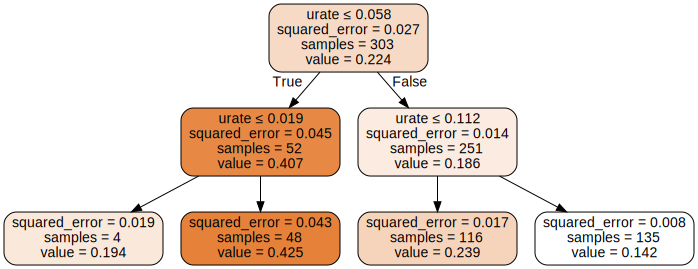

In [27]:
dot_data = tree.export_graphviz(
        dtr,
        out_file = None,
        feature_names = ['urate'],
        filled = True,
        rounded = True,
        special_characters = True
    )

graph = graphviz.Source(dot_data)

graph.render('decision_tree')

graph